In [23]:
# Import required libraries
import pandas as pd
import random
from datetime import datetime, timedelta

# Step 1: List of Products
products = ["Parle-G Biscuits", "Dettol Soap", "Surf Excel", "Fortune Oil", "Tata Salt"]

# Step 2: Generate Date Range (10 days)
start_date = datetime(2025, 4, 28)  # Starting date: April 28, 2025
dates = [start_date + timedelta(days=i) for i in range(10)]  # Generate next 10 days

# Step 3: Create Random Price Data for Each Product Over 10 Days
price_data = []  # List to hold our final data
for date in dates:
    for product in products:
        price = random.randint(10, 150)  # Random price between ₹10 and ₹150
        price_data.append([date.strftime('%Y-%m-%d'), product, price])

# Step 4: Create DataFrame Using Pandas
df = pd.DataFrame(price_data, columns=["Date", "Product", "Price"])

# Step 5: Save Data to CSV File
df.to_csv("local_price_tracker.csv", index=False)

# Optional: Print out the DataFrame to check
print(df)


          Date           Product  Price
0   2025-04-28  Parle-G Biscuits     42
1   2025-04-28       Dettol Soap     56
2   2025-04-28        Surf Excel    126
3   2025-04-28       Fortune Oil     55
4   2025-04-28         Tata Salt    128
5   2025-04-29  Parle-G Biscuits     16
6   2025-04-29       Dettol Soap    138
7   2025-04-29        Surf Excel     88
8   2025-04-29       Fortune Oil     20
9   2025-04-29         Tata Salt     89
10  2025-04-30  Parle-G Biscuits    149
11  2025-04-30       Dettol Soap     53
12  2025-04-30        Surf Excel     14
13  2025-04-30       Fortune Oil    149
14  2025-04-30         Tata Salt     48
15  2025-05-01  Parle-G Biscuits     23
16  2025-05-01       Dettol Soap     69
17  2025-05-01        Surf Excel     12
18  2025-05-01       Fortune Oil    106
19  2025-05-01         Tata Salt     22
20  2025-05-02  Parle-G Biscuits     95
21  2025-05-02       Dettol Soap    100
22  2025-05-02        Surf Excel    136
23  2025-05-02       Fortune Oil     87


In [24]:
import pandas as pd

# Load the data
df = pd.read_csv("local_price_tracker.csv")

# View the first few rows
print(df.head())

         Date           Product  Price
0  2025-04-28  Parle-G Biscuits     42
1  2025-04-28       Dettol Soap     56
2  2025-04-28        Surf Excel    126
3  2025-04-28       Fortune Oil     55
4  2025-04-28         Tata Salt    128


In [25]:
# Summary of dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check basic statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     50 non-null     object
 1   Product  50 non-null     object
 2   Price    50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None
Date       0
Product    0
Price      0
dtype: int64
            Price
count   50.000000
mean    83.200000
std     43.197695
min     12.000000
25%     49.000000
50%     88.500000
75%    124.000000
max    149.000000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

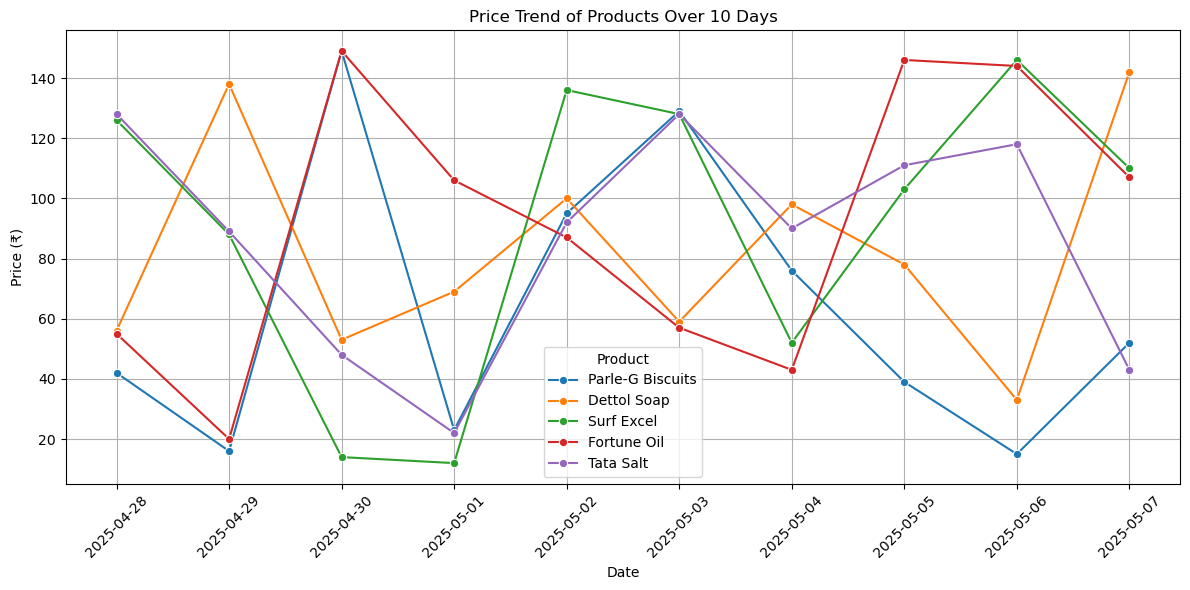

In [27]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Plot price trend for each product
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Price", hue="Product", marker="o")
plt.title("Price Trend of Products Over 10 Days")
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='Product', ylabel='Price'>

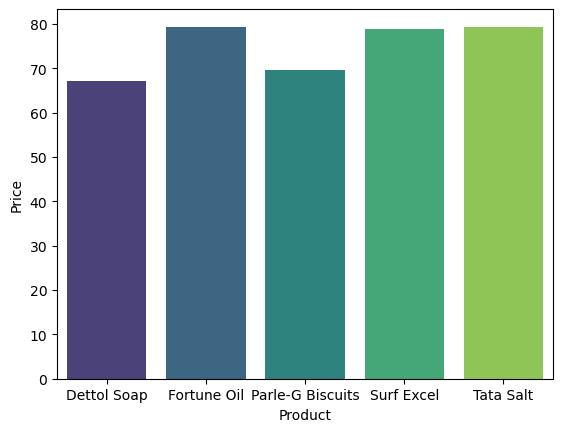

In [28]:
sns.barplot(data=avg_price, x="Product", y="Price", hue="Product", palette="viridis", dodge=False, legend=False)

C:\Users\vikru\AppData\Local\Temp\ipykernel_26948\3087299917.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x="Product", y="Price", palette="viridis")


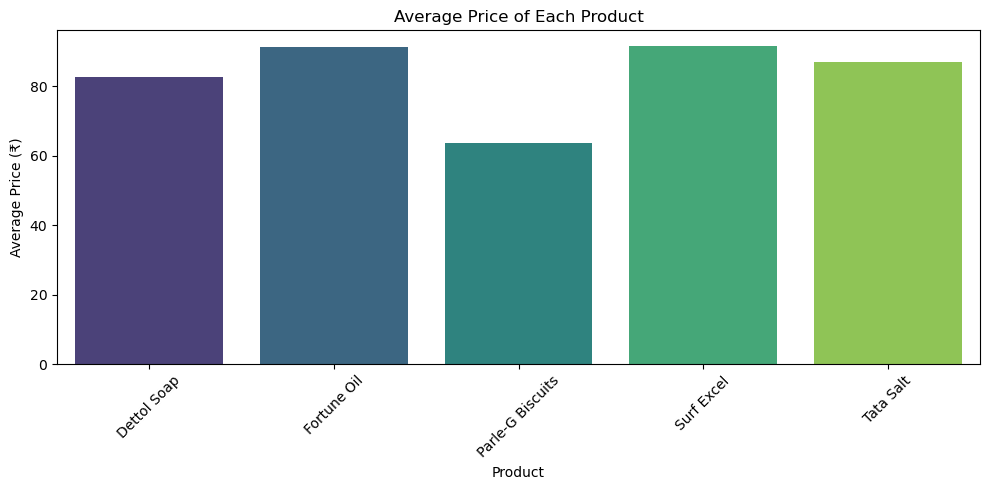

In [29]:
avg_price = df.groupby("Product")["Price"].mean().reset_index()

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_price, x="Product", y="Price", palette="viridis")
plt.title("Average Price of Each Product")
plt.ylabel("Average Price (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
import sqlite3

# Step 1: Load your CSV
df = pd.read_csv("local_price_tracker.csv")

# Step 2: Create an in-memory SQLite DB
conn = sqlite3.connect(":memory:")
df.to_sql("price_tracker", conn, index=False, if_exists="replace")

# Step 3: Run your SQL query
query = """
SELECT 
    Product,
    Date,
    Price,
    LAG(Price) OVER (PARTITION BY Product ORDER BY Date) AS Previous_Price,
    (Price - LAG(Price) OVER (PARTITION BY Product ORDER BY Date)) AS Price_Change
FROM price_tracker;
"""

result = pd.read_sql_query(query, conn)
print(result)


             Product        Date  Price  Previous_Price  Price_Change
0        Dettol Soap  2025-04-28     56             NaN           NaN
1        Dettol Soap  2025-04-29    138            56.0          82.0
2        Dettol Soap  2025-04-30     53           138.0         -85.0
3        Dettol Soap  2025-05-01     69            53.0          16.0
4        Dettol Soap  2025-05-02    100            69.0          31.0
5        Dettol Soap  2025-05-03     59           100.0         -41.0
6        Dettol Soap  2025-05-04     98            59.0          39.0
7        Dettol Soap  2025-05-05     78            98.0         -20.0
8        Dettol Soap  2025-05-06     33            78.0         -45.0
9        Dettol Soap  2025-05-07    142            33.0         109.0
10       Fortune Oil  2025-04-28     55             NaN           NaN
11       Fortune Oil  2025-04-29     20            55.0         -35.0
12       Fortune Oil  2025-04-30    149            20.0         129.0
13       Fortune Oil